In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

## Plot Function

In [63]:
def plotGrid(matrix, trueState = None, estimatedState = None, title = None, fileName = None):

    figure, ax = plt.subplots()
    start, end = 0, 30


    temp = matrix.copy()
    temp = np.abs(np.log(temp + 1e-12))
    temp = temp / np.max(temp)
    temp = temp.T

    #Set the properties of the grid
    ax.set_box_aspect(1)
    ax.grid(b = True, which = 'major')
    ax.set_box_aspect(1)
    ax.set_xlim(-0.5,29.5)
    ax.set_ylim(-0.5, 29.5)
    ax.set_xticks(np.arange(-0.5,29.5,1))
    ax.set_yticks(np.arange(-0.5,29.5,1))

    #Setting the color scheme
    cmap = plt.cm.gray
    normalize = plt.Normalize(temp.min(), temp.max())
    color = cmap(normalize(temp))

    sensors = np.array([[8, 15], [15, 15], [22, 15], [15, 22]])
    for i in range(0,4):
        sensX = sensors[i][0]
        sensY = sensors[i][1]
        ax.text(sensX, sensY, 's', va = 'center', ha = 'center', color = 'blue', weight = 'bold')
    
    if(trueState):
        x, y = trueState
        ax.text(x, y, 'T', va = 'center', ha = 'center', color = 'orange', weight = 'bold')

    if(estimatedState):
        x, y = estimatedState
        ax.text(x, y, 'E', va = 'center', ha = 'center', color = 'red', weight = 'bold')

    if(title): ax.set_title(title)
    
    ax.grid(b = True, which = 'major')
    plt.imshow(color, interpolation = 'nearest')
    #xticks = ax.xaxis.get_major_ticks()
    #yticks = ax.yaxis.get_major_ticks()

    #yticks[2].set_visible(False)
    #xticks[2].set_visible(False)
    
    if(fileName):
        plt.savefig(fileName)
        plt.close()
    
    plt.show()


## Part a -- Move the agent and take observations

#### Move the agent

In [64]:
def move(position):
    num = np.random.randint(10) + 1
    #print(num)
    newPos = position.copy()
    
    #up, down, left, right
    if(num <= 4):
        newPos[1] += 1
    elif(num <= 5):
        newPos[1] -= 1
    elif(num <= 7):
        newPos[0] -= 1
    else:
        newPos[0] += 1
    
    if(newPos[0] < 0 or newPos[0] > 29 or newPos[1] < 0 or newPos[1] > 29): return position, False
    return newPos, True

#### Sensor measurements

In [65]:
def observe(position):
    sensors = np.array([[8,15], [15,15], [22,15], [15,22]])
    observations = np.zeros((4))

    for i in range(0, 4):
        diff_x = abs(sensors[i][0] - position[0])
        diff_y = abs(sensors[i][1] - position[1])
        val = max(diff_x, diff_y)

        if(val > 4):
            #print("val more than 4 for:", position, "and sensor ", sensors[i])
            continue
        else:
            num = np.random.randint(10) + 1
            if(num > 9 - val): continue

            observations[i] = 1
    
    return observations

#### Motion model and sensor model

In [66]:
position = np.array([15,15])

motionModel = np.zeros((25, 2))
sensorModel = np.zeros((25, 4))

for i in range(0, 25):
    newPos, flag = move(position)
    position[0:] = newPos[0:].copy()
    motionModel[i][0:] = newPos.copy()

    if(flag or i!= 0):
        observations = observe(newPos)
        sensorModel[i][0:] = observations.copy()
    else:
        sensorModel[i][0:] = sensorModel[i-1][0:].copy()

print(motionModel)
print("Sensor Model")
print(sensorModel)

[[14. 15.]
 [15. 15.]
 [15. 16.]
 [14. 16.]
 [14. 17.]
 [14. 18.]
 [13. 18.]
 [13. 19.]
 [12. 19.]
 [12. 18.]
 [13. 18.]
 [12. 18.]
 [13. 18.]
 [13. 19.]
 [12. 19.]
 [11. 19.]
 [10. 19.]
 [10. 20.]
 [10. 21.]
 [10. 22.]
 [11. 22.]
 [11. 21.]
 [11. 22.]
 [11. 23.]
 [11. 22.]]
Sensor Model
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]


## Part b -- Filtering

#### For sensor model part

In [67]:
def sensorProb(position):
    sensors = np.array([[8,15], [15,15], [22,15], [15,22]])
    probabilities = np.zeros((4))

    for i in range(0, 4):
        diff_x = abs(sensors[i][0] - position[0])
        diff_y = abs(sensors[i][1] - position[1])
        val = max(diff_x, diff_y)

        if(val > 4):
            #print("val more than 4 for:", position, "and sensor ", sensors[i])
            continue
        else:
            probabilities[i] = 0.9 - (val/10)

    return probabilities

#### Calculating belief matrix for all time steps

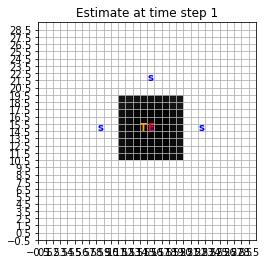

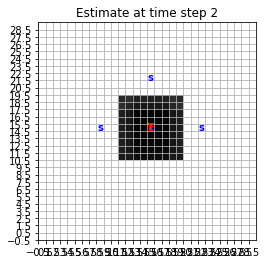

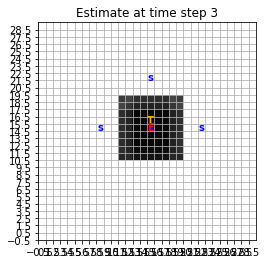

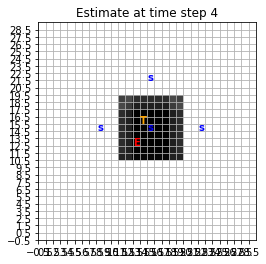

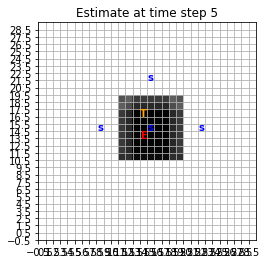

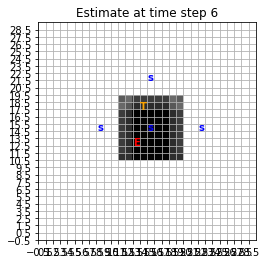

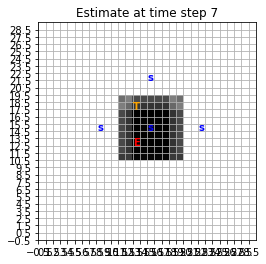

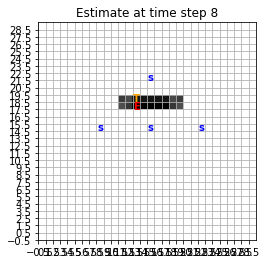

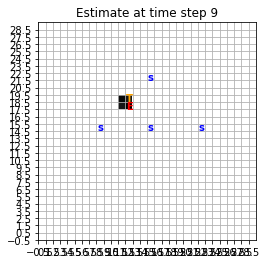

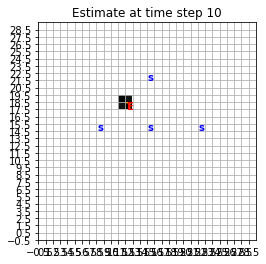

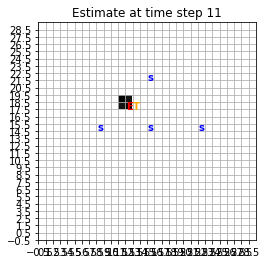

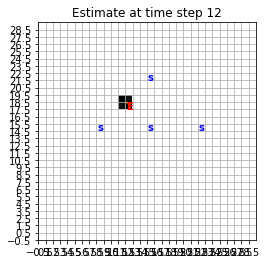

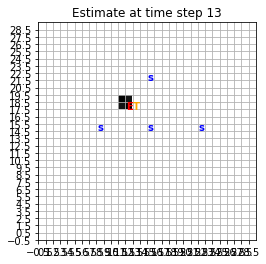

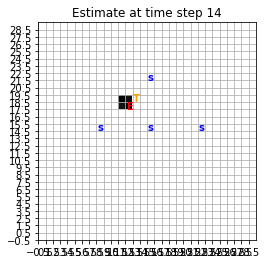

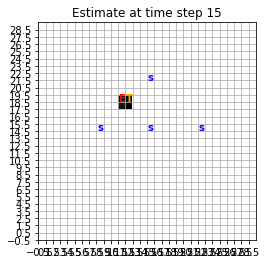

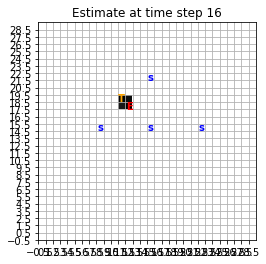

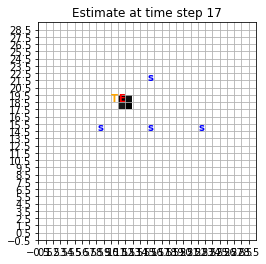

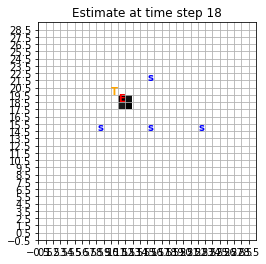

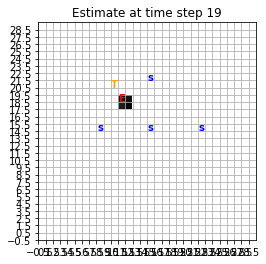

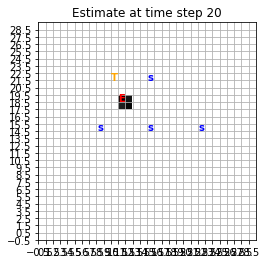

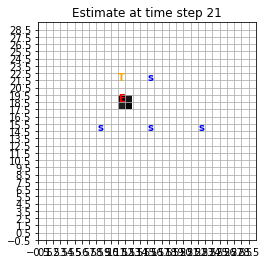

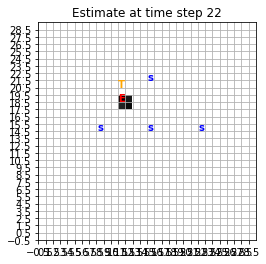

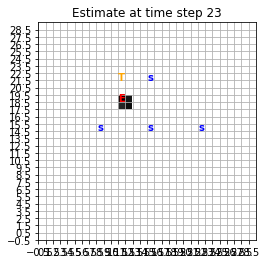

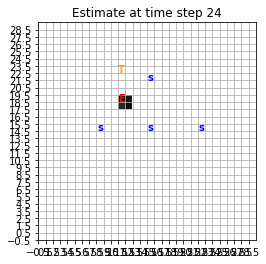

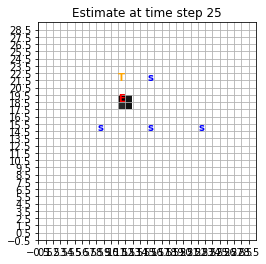

In [68]:
#intial belief is uniform
belief = np.zeros((26, 30, 30))
belief[0][0:][0:] = np.full((30, 30), 1/900)
#print(belief)

estimated = np.zeros((25,2))

for i in range(1, 26):
    normalizeSum = 0
    estimatedPos = np.array([0,0])
    maxBel = -1

    for j in range(0, 30):
        for k in range(0, 30):
            curr = np.array([j, k])
            probabilities = sensorProb(curr)
            observations = sensorModel[i-1][0:].copy()

            #Probability of getting that observation(Correction)
            obsProb = 1
            for index in range(0, 4):
                if(observations[index] == 0):
                    obsProb *= 1 - probabilities[index]
                else:
                    obsProb *= probabilities[index]
            
            #Prediction
            prevPos = np.array([[j-1, k], [j, k-1], [j+1, k], [j, k+1]])
            transitionProbs = np.array([0.3, 0.4, 0.2, 0.1])
            
            prediction = 0
            for index in range(0, 4):
                temp = prevPos[index].copy()
                if(temp[0] < 0 or temp[0] > 29 or temp[1] < 0 or temp[1] > 29): continue

                prediction += transitionProbs[index] * belief[i-1][j][k]
            
            #Belief for this state
            currBelief = obsProb * prediction
            belief[i][j][k] = currBelief
            normalizeSum += currBelief

            if(currBelief > maxBel):
                maxBel = currBelief
                estimatedPos = np.array([j, k])

    belief[i][0:][0:] = belief[i][0:][0:] / normalizeSum
    estimated[i-1] = estimatedPos.copy()

for i in range(0, 25):
    plotGrid(belief[i+1], (motionModel[i][0], motionModel[i][1]), (estimated[i][0], estimated[i][1]), 'Estimate at time step ' + str(i + 1))
    #for j in range(0, 30):
     #   for k in range(0, 30):
      #      belief[i][j][k] = belief[i][j][k] / normalizeSum 

#print(belief)
#for i in range(0, 25):
#    print("True state " , motionModel[i] , " Estimated Position " , estimated[i])

#for i in range(0, 25):
#   plot_likelihood(motionModel[i], belief[i+1], (estimated[i][0], estimated[i][1]), title = 'Smoothed time step ' + str(i))

## Part c -- Smoothing

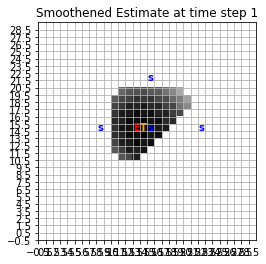

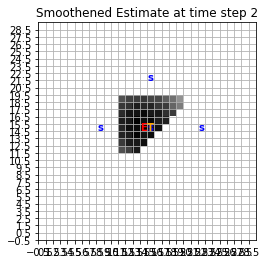

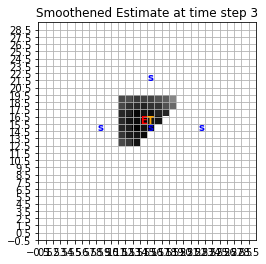

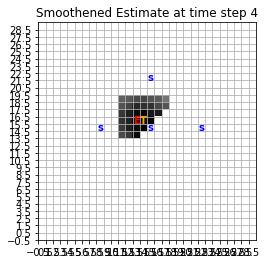

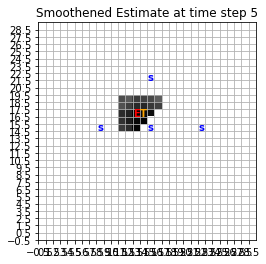

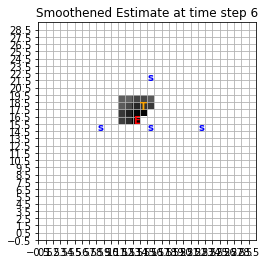

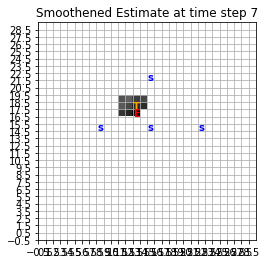

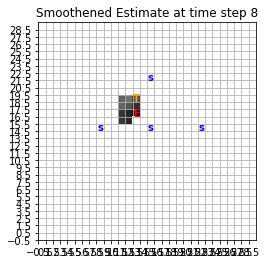

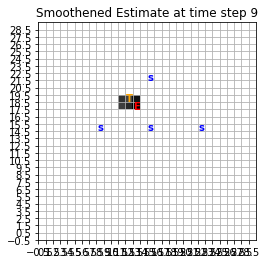

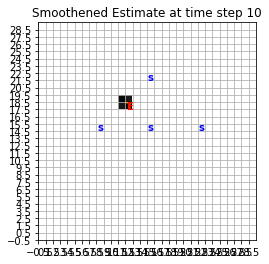

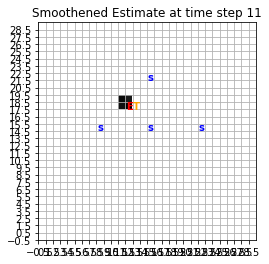

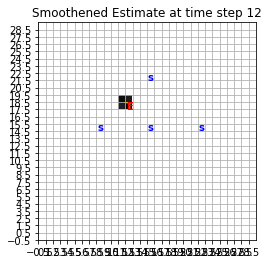

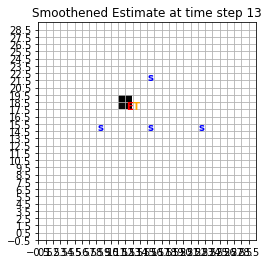

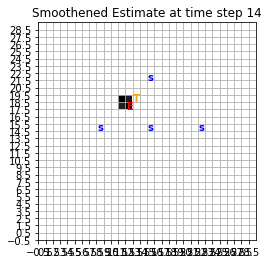

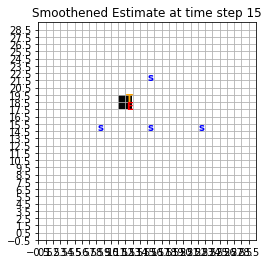

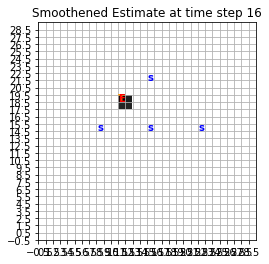

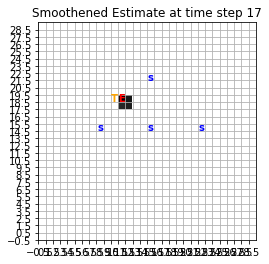

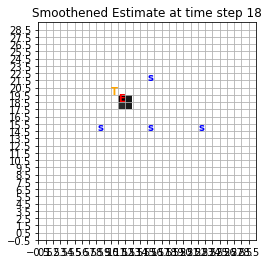

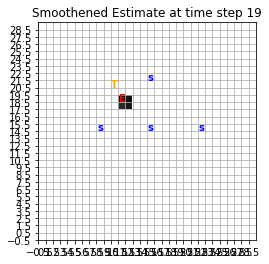

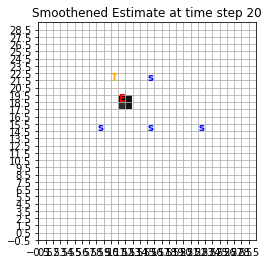

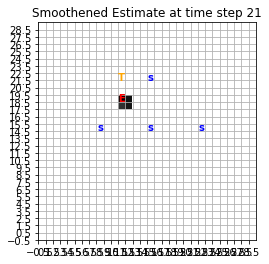

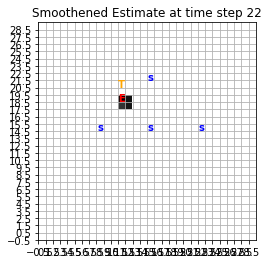

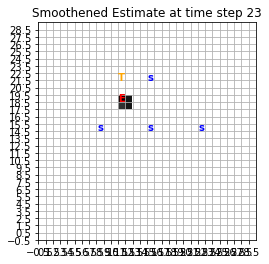

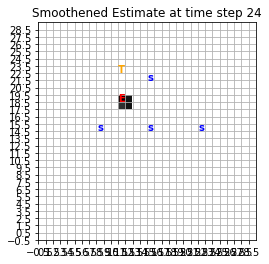

In [69]:
#final smoothened beliefs
smoothed = np.zeros((24, 30, 30))
#matrix for recursion
backprop = np.zeros((25, 30, 30))

#base case P(e26:25/x25)
backprop[24][0:][0:] = np.full((30, 30), 1)

smoothedStates = np.zeros((25,2))

for i in range(23, -1, -1):
    #normalizing factor alpha
    normalizeSum = 0
    estimatedPos = np.array([0,0])
    maxBel = -1

    for j in range(0, 30):
        for k in range(0, 30):
            curr = 0
            #check every possible transition
            nextPos = np.array([[j-1, k], [j, k+1], [j+1, k], [j, k-1]])
            transitionProbs = np.array([0.2, 0.4, 0.3, 0.1])

            for index in range(0, 4):
                temp = nextPos[index].copy()

                #transition not possible
                if(temp[0] < 0 or temp[1] < 0 or temp[0] > 29 or temp[1] > 29): continue

                #transition possible, get the sensor probablities at that position
                probabilities = sensorProb(temp)
                observations = sensorModel[i+1][0:].copy()
                obsProb = 1

                #calculate P(e/x)
                for a in range(0,4):
                    if(observations[a] == 1):
                        obsProb *= probabilities[a]
                    else:
                        obsProb *= 1 - probabilities[a]
                
                #recursion step incorporating sensor and transition model
                curr += obsProb * transitionProbs[index] * backprop[i+1][temp[0]][temp[1]]
        
            #update the matrices
            backprop[i][j][k] = curr
            smoothed[i][j][k] = curr * belief[i][j][k]

            if(smoothed[i][j][k] > maxBel):
                maxBel = smoothed[i][j][k]
                estimatedPos = np.array([j, k])

            normalizeSum += smoothed[i][j][k]
    
    #normalize
    smoothed[i][0:][0:] = smoothed[i][0:][0:] / normalizeSum
    smoothedStates[i] = estimatedPos.copy()

smoothedStates[24] = estimated[24].copy()
np.set_printoptions(threshold=np. inf)
#print(f'{smoothed}')
#print(backprop)
#plot_likelihood(motionModel[0], smoothed[0], (estimated[0][0], estimated[0][1]), title='Smoothed.')
#for i in range(0, 25):
#   plot_likelihood(motionModel[i], smoothed[i], (estimated[i][0], estimated[i][1]), title = 'Smoothed time step ' + str(i))
for i in range(0, 24):
    plotGrid(smoothed[i], (motionModel[i][0], motionModel[i][1]), (smoothedStates[i][0], smoothedStates[i][1]), 'Smoothened Estimate at time step ' + str(i + 1))

#plot_likelihood(motionModel[0], smoothed[0], (estimated[0][0], estimated[0][1]), title = 'Smoothed')

In [70]:
for i in range(0, 25):
    print('true', motionModel[i], 'estimated', estimated[i], 'smoothed', smoothedStates[i])

true [14. 15.] estimated [15. 15.] smoothed [13. 15.]
true [15. 15.] estimated [15. 15.] smoothed [14. 15.]
true [15. 16.] estimated [15. 15.] smoothed [14. 16.]
true [14. 16.] estimated [13. 13.] smoothed [13. 16.]
true [14. 17.] estimated [14. 14.] smoothed [13. 17.]
true [14. 18.] estimated [13. 13.] smoothed [13. 16.]
true [13. 18.] estimated [13. 13.] smoothed [13. 17.]
true [13. 19.] estimated [13. 18.] smoothed [13. 17.]
true [12. 19.] estimated [12. 18.] smoothed [13. 18.]
true [12. 18.] estimated [12. 18.] smoothed [12. 18.]
true [13. 18.] estimated [12. 18.] smoothed [12. 18.]
true [12. 18.] estimated [12. 18.] smoothed [12. 18.]
true [13. 18.] estimated [12. 18.] smoothed [12. 18.]
true [13. 19.] estimated [12. 18.] smoothed [12. 18.]
true [12. 19.] estimated [11. 19.] smoothed [12. 18.]
true [11. 19.] estimated [12. 18.] smoothed [11. 19.]
true [10. 19.] estimated [11. 19.] smoothed [11. 19.]
true [10. 20.] estimated [11. 19.] smoothed [11. 19.]
true [10. 21.] estimated [11

## Part d -- Manhattan Distance between True state and Estimated state

[1 0 1 4 3 6 5 1 1 0 1 0 1 2 1 2 1 2 3 4 3 2 3 4 3]
[1 1 1 1 1 3 1 2 2 0 1 0 1 2 1 0 1 2 3 4 3 2 3 4 3]


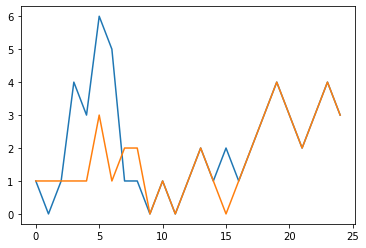

In [71]:
# array to store the manhattan distances
estDistance = np.zeros(25, np.int16)
smtDistance = np.zeros(25, np.int16)

for i in range(0, 25):
    currTrue = motionModel[i].copy()
    currEstimated = estimated[i].copy()
    currSmoothed = smoothedStates[i].copy()
    #formula for manhattan distance
    curr = abs(currTrue[0] - currEstimated[0]) + abs(currTrue[1] - currEstimated[1])
    estDistance[i] = curr
    smtDistance[i] = abs(currTrue[0] - currSmoothed[0]) + abs(currTrue[1] - currSmoothed[1])

print(estDistance)
print(smtDistance)
plt.plot(estDistance)
plt.plot(smtDistance)
plt.show()

## Part e -- Predictive Likelihood

In [72]:
prediction = np.zeros((26, 30 , 30))
prediction[0] = belief[25].copy()
predictedStates = np.zeros((25,2))

for i in range(1, 26):

    normalizeSum = 0
    maxPred = -1
    predictedState = np.zeros((0,0))

    for j in range(0, 30):
        for k in range(0, 30):

            prevPos = np.array([[j-1, k], [j, k-1], [j+1, k], [j, k+1]])
            transitionProbs = np.array([0.3, 0.4, 0.2, 0.1])

            currPred = 0
            for index in range(0, 4):
                temp = prevPos[index].copy()
                if(temp[0] < 0 or temp[0] > 29 or temp[1] < 0 or temp[1] > 29): continue

                currPred += transitionProbs[index] * prediction[i-1][temp[0]][temp[1]]
                #print("currpred is ", currPred, " for time step ", i-1)
            
            prediction[i][j][k] = currPred
            if(currPred > maxPred):
                maxPred = currPred
                predictedState = np.array([j, k])
            
            predictedStates[i - 1] = predictedState.copy()
            normalizeSum += currPred
        
    prediction[i] = prediction[i] / normalizeSum

#print(prediction)
print(predictedStates)

[[11. 20.]
 [12. 20.]
 [11. 20.]
 [12. 20.]
 [12. 21.]
 [11. 21.]
 [12. 21.]
 [12. 22.]
 [13. 22.]
 [12. 22.]
 [12. 23.]
 [13. 23.]
 [12. 23.]
 [13. 23.]
 [13. 24.]
 [12. 24.]
 [13. 24.]
 [13. 25.]
 [14. 25.]
 [13. 25.]
 [13. 26.]
 [14. 26.]
 [13. 26.]
 [14. 26.]
 [14. 27.]]


#### Move the agent for 25 more time steps and get the extened motion model

[11. 22.]
[[12. 22.]
 [12. 23.]
 [13. 23.]
 [13. 24.]
 [14. 24.]
 [13. 24.]
 [12. 24.]
 [12. 25.]
 [11. 25.]
 [12. 25.]
 [11. 25.]
 [12. 25.]
 [12. 26.]
 [13. 26.]
 [14. 26.]
 [14. 27.]
 [13. 27.]
 [13. 28.]
 [14. 28.]
 [14. 29.]
 [14. 29.]
 [14. 29.]
 [13. 29.]
 [13. 29.]
 [13. 29.]]


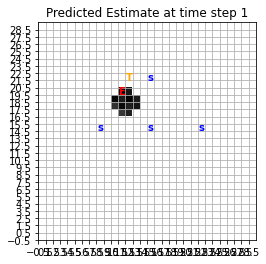

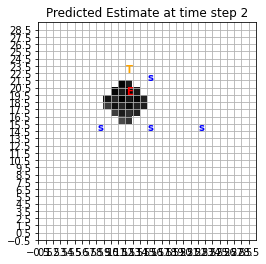

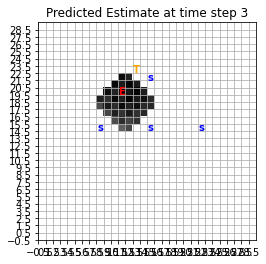

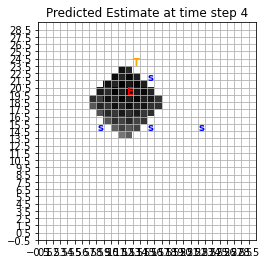

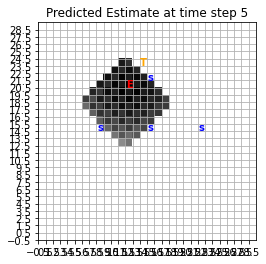

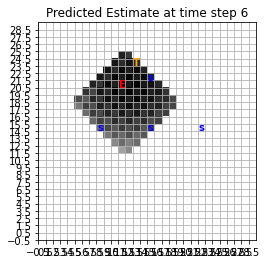

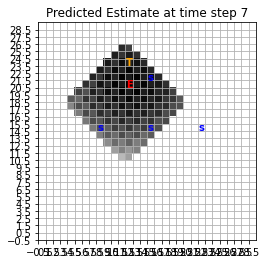

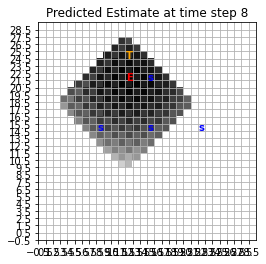

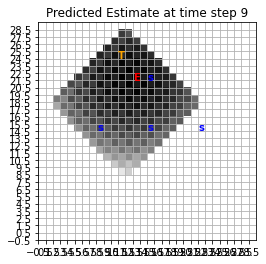

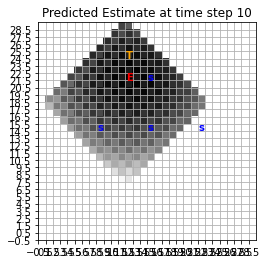

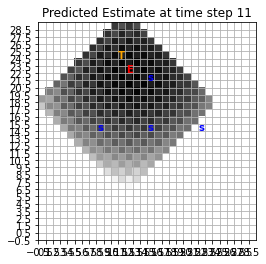

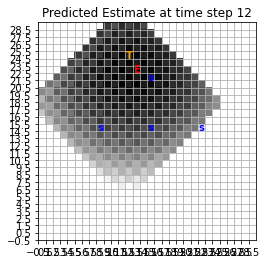

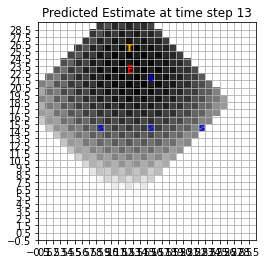

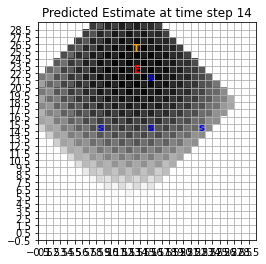

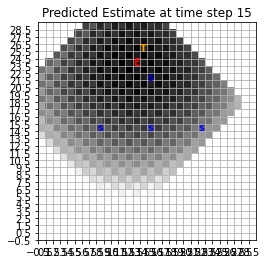

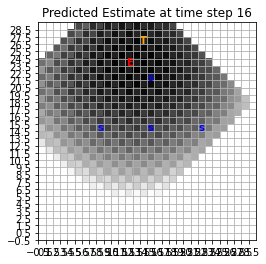

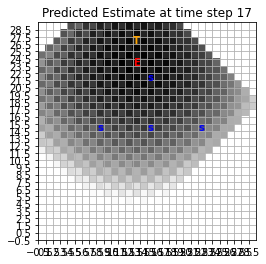

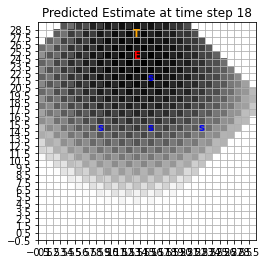

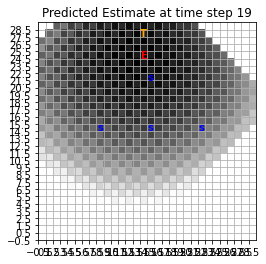

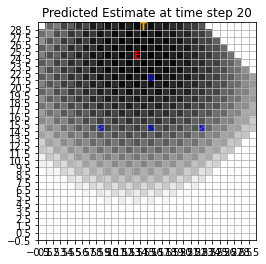

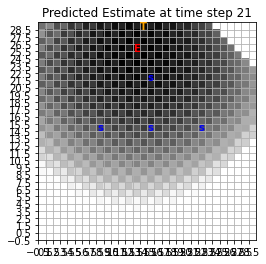

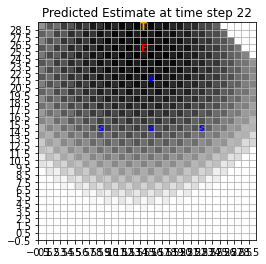

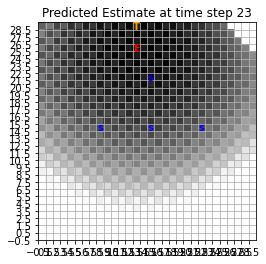

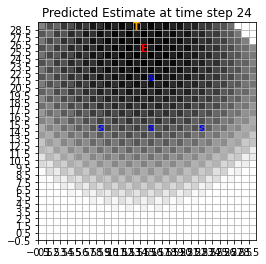

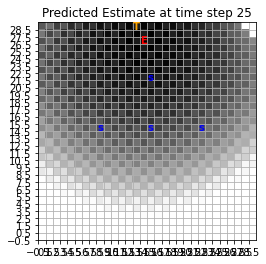

In [73]:
position = motionModel[24].copy()
print(position)
newMotionModel = np.zeros((25, 2))

for i in range(0, 25):
    newPos, flag = move(position)
    position[0:] = newPos[0:].copy()
    newMotionModel[i][0:] = newPos.copy()

print(newMotionModel)
for i in range(1, 26):
    plotGrid(prediction[i], (newMotionModel[i-1][0], newMotionModel[i-1][1]), (predictedStates[i-1][0], predictedStates[i-1][1]), 'Predicted Estimate at time step ' + str(i))


## Part f -- Most likely sequence

In [74]:
message = np.zeros((26, 30, 30))
message[0] = np.full((30,30), 1/900)

#Calculating the messages for all time steps
for i in range(1, 26):
    for j in range(0, 30):
        for k in range(0, 30):
            probabilities = sensorProb(np.array([j, k]))
            observations = sensorModel[i-1].copy()
            obsProb = 1

            for index in range(0, 4):
                if(observations[index] == 1):
                    obsProb *= probabilities[index]
                else:
                    obsProb *= (1 - probabilities[index])
            
            maxVal = -1
            
            prevPos = np.array([[j-1, k], [j, k-1], [j+1, k], [j, k+1]])
            transitionProbs = np.array([0.3, 0.4, 0.2, 0.1])

            for index in range(0, 4):
                temp = prevPos[index].copy()
                if(temp[0] < 0 or temp[0] > 29 or temp[1] < 0 or temp[1] > 29): continue

                maxVal = max(maxVal, transitionProbs[index] * message[i-1][temp[0]][temp[1]])
            
            currMessage = obsProb * maxVal
            message[i][j][k] = currMessage


sequence = np.zeros((25,2))

#Most likely final state
val = -1
state = np.zeros(2)

for i in range(0,30):
    for j in range(0, 30):
        if(message[-1][i][j] > val):
            val = message[-1][i][j]
            state = np.array([i, j])

'''count = 0

for i in range(0,30):
    for j in range(0,30):
        if(message[-1][i][j] == ):
            count += 1
print(count)'''

sequence[-1] = state

#Backtracking
for i in range(23, -1, -1):
    j = sequence[i+1][0].copy()
    k = sequence[i+1][1].copy()

    prevPos = np.array([[j-1, k], [j, k-1], [j+1, k], [j, k+1]])

    val = -1
    state = np.zeros(2)

    for index in range(0, 4):
        temp = prevPos[index].copy()
        if(temp[0] < 0 or temp[0] > 29 or temp[1] < 0 or temp[1] > 29): continue

        #print("i", i, "temp[0]", temp[0], "temp[1]", temp[1])
        if(message[i][int(temp[0])][int(temp[1])] > val):
            state = np.array([temp[0], temp[1]])
    
    sequence[i] = state.copy()

#print(sequence)
for i in range(0, 25):
    print("sequence", sequence[i], "true", motionModel[i])



sequence [29. 29.] true [14. 15.]
sequence [29. 28.] true [15. 15.]
sequence [29. 29.] true [15. 16.]
sequence [28. 29.] true [14. 16.]
sequence [27. 29.] true [14. 17.]
sequence [26. 29.] true [14. 18.]
sequence [25. 29.] true [13. 18.]
sequence [24. 29.] true [13. 19.]
sequence [23. 29.] true [12. 19.]
sequence [22. 29.] true [12. 18.]
sequence [21. 29.] true [13. 18.]
sequence [20. 29.] true [12. 18.]
sequence [19. 29.] true [13. 18.]
sequence [18. 29.] true [13. 19.]
sequence [17. 29.] true [12. 19.]
sequence [16. 29.] true [11. 19.]
sequence [15. 29.] true [10. 19.]
sequence [14. 29.] true [10. 20.]
sequence [13. 29.] true [10. 21.]
sequence [12. 29.] true [10. 22.]
sequence [11. 29.] true [11. 22.]
sequence [11. 28.] true [11. 21.]
sequence [11. 27.] true [11. 22.]
sequence [11. 26.] true [11. 23.]
sequence [11. 25.] true [11. 22.]
